# Task 1. MNIST Classification.

In this task we're gonna build 3 models for classification of handwritten digits from the famous MNIST dataset. The MNIST dataset consists of 60,000 training images and 10,000 test images. Our classes are the digits 0-9.
There are 3 algorithms we're gonna build:
1. Neural Network (Feedforward Neural Network)
2. Convolutional Neural Network (CNN).
3. Random Forest.

## Importing all needed packages and dependencies

In [15]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from tensorflow.keras.datasets import mnist

In [17]:
from mnist_classifier import MnistClassifier

In [18]:
def load_mnist_dataset():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalization process, the x values will be from 0 to 1
    X_train = (X_train / 255).astype(np.float32)
    X_test = (X_test / 255).astype(np.float32)

    y_train = y_train.astype(np.int64)
    y_test = y_test.astype(np.int64)

    return X_train, X_test, y_train, y_test

In [19]:
def evaluate_model(y_pred, y_true):
    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    class_report = classification_report(y_true, y_pred)

    return accuracy, cm, class_report

## Loading the dataset

In [20]:
X_train, X_test, y_train, y_test = load_mnist_dataset()

As we can notice, the values are between 0 and 1 - the result of the normalization

In [21]:
print(f"Max value in X_train: {X_train.max()}, min value: {X_train.min()}")

Max value in X_train: 1.0, min value: 0.0


In the dataset there are train values and 10000 test values. Moreover, the shape for x values is 28 * 28, which is a matrix. Each value represents a pixel. The value in the pixel varied from 0 to 255 (0 - black, 255 - white), now it's between 0 and 1

In [22]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


Visualization of random 36 values

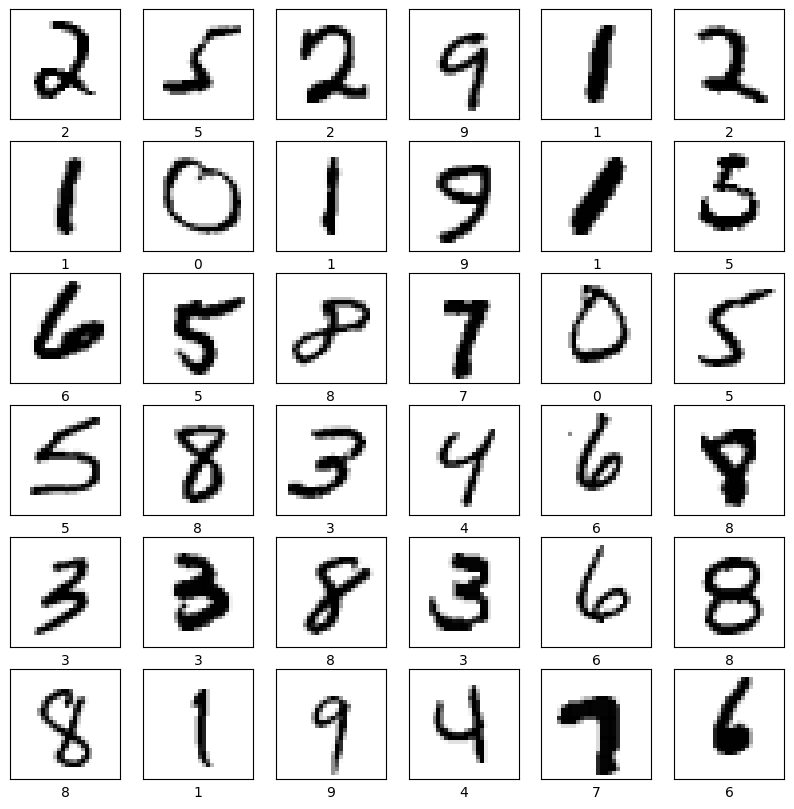

In [23]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(X_train[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(y_train[image_ind])


## Neural Network (NN) Model 

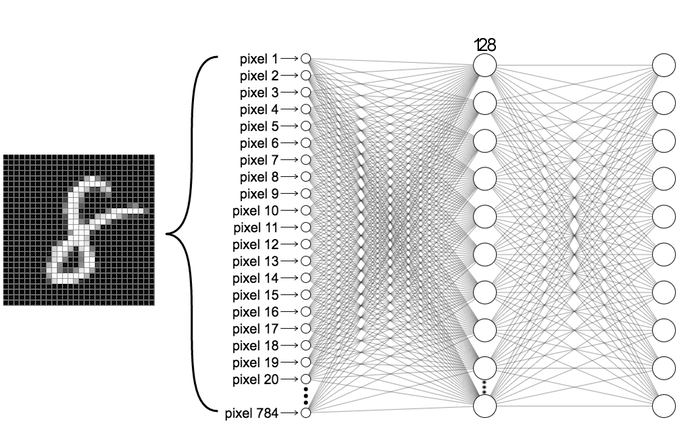

In [24]:
nn_classifier = MnistClassifier(algorithm='nn')

C:\Users\Alex\Desktop\Internship_tasks\task1\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [25]:
nn_classifier.train(x_train = X_train, y_train = y_train)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9166 - loss: 0.2998
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9629 - loss: 0.1313
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9735 - loss: 0.0913
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9789 - loss: 0.0700
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9832 - loss: 0.0550


In [26]:
y_pred_nn = nn_classifier.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step


In [27]:
accuracy_nn, cm_nn, class_report_nn = evaluate_model(y_pred_nn, y_test)

In [28]:
print(f'Test accuracy for Neural Network (NN): {accuracy_nn}')

Test accuracy for Neural Network (NN): 0.9776


In [29]:
labels = range(0, 10)

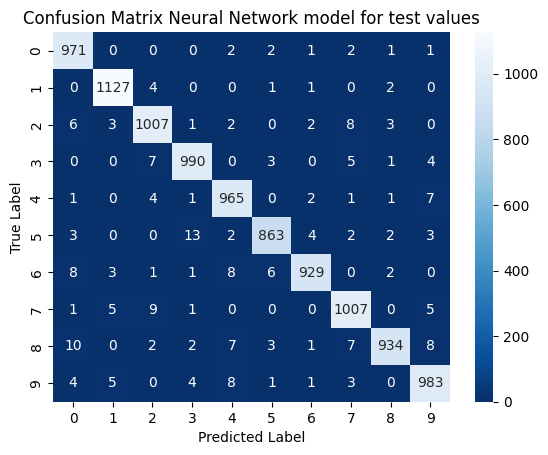

In [30]:
heatmap = sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Neural Network model for test values')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [31]:
print('Classification Report for Neural Network: ', class_report_nn)

Classification Report for Neural Network:                precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Convolutional Neural Network (CNN) Model

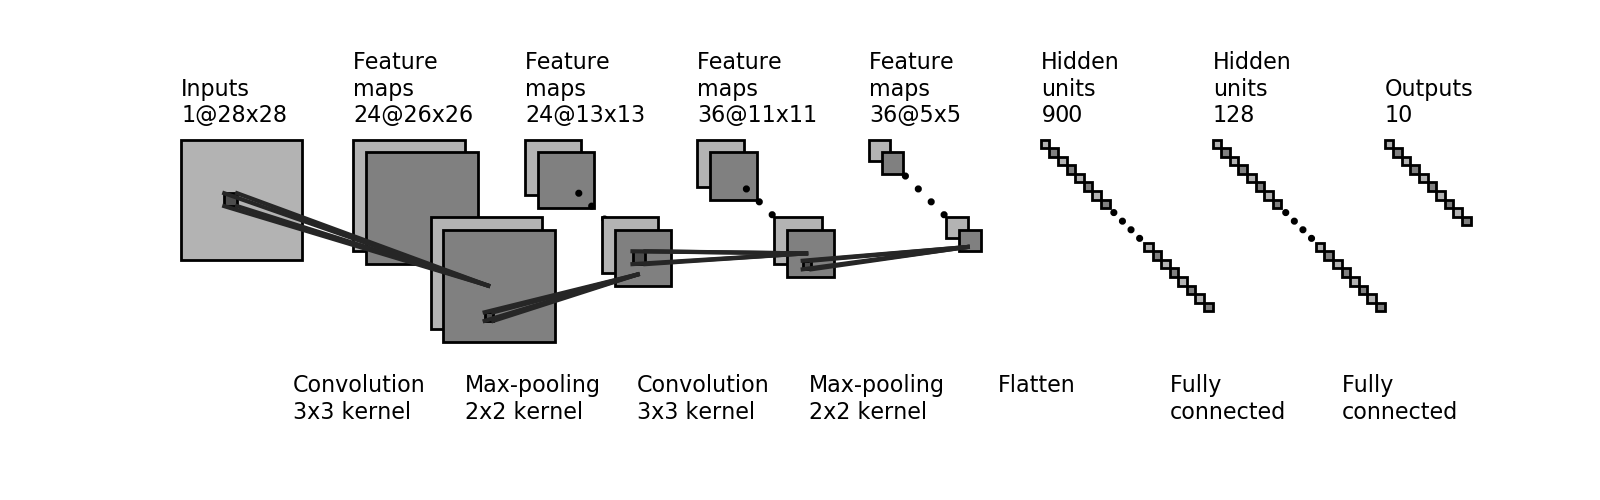

In [32]:
cnn_classifier = MnistClassifier(algorithm='cnn')

C:\Users\Alex\Desktop\Internship_tasks\task1\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [33]:
cnn_classifier.train(x_train = X_train, y_train = y_train)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9463 - loss: 0.1823
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9833 - loss: 0.0544
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9880 - loss: 0.0382
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9907 - loss: 0.0293
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9927 - loss: 0.0223


In [34]:
y_pred_cnn = cnn_classifier.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [35]:
accuracy_cnn, cm_cnn, class_report_cnn = evaluate_model(y_pred_cnn, y_test)

In [36]:
print(f'Test accuracy for Convolutional Neural Network (CNN): {accuracy_cnn}')

Test accuracy for Convolutional Neural Network (CNN): 0.9905


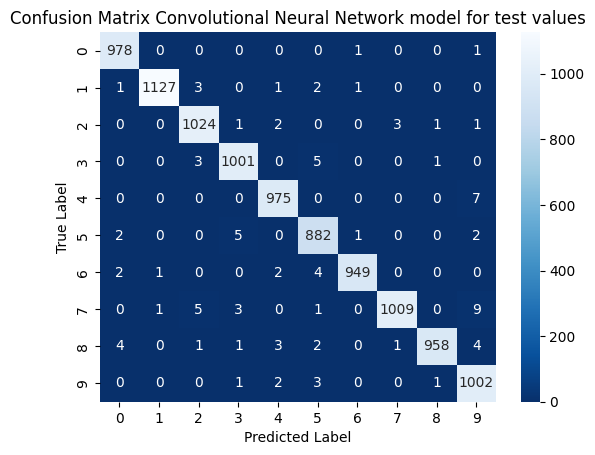

In [37]:
heatmap = sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Convolutional Neural Network model for test values')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
print('Classification Report for Neural Network: ', class_report_cnn)

Classification Report for Neural Network:                precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Random Forest Model

In [46]:
rf_classfier = MnistClassifier(algorithm='rf')

In [47]:
rf_classfier.train(X_train, y_train)

In [48]:
y_pred_rf = rf_classfier.predict(X_test)

In [49]:
accuracy_rf, cm_rf, class_report_rf = evaluate_model(y_pred_rf, y_test)

In [50]:
print(f'Test accuracy for Random Forest Model: {accuracy_rf}')

Test accuracy for Random Forest Model: 0.9704


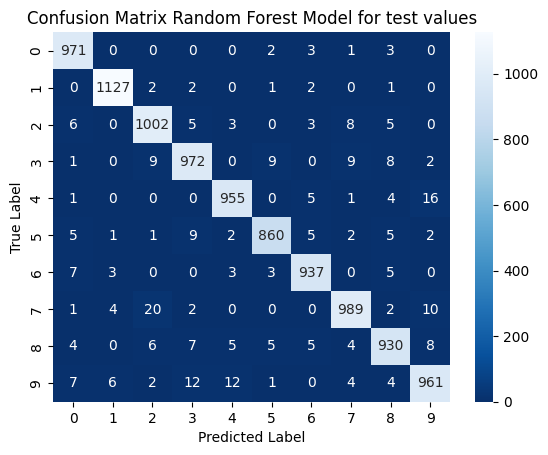

In [51]:
heatmap = sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Random Forest Model for test values')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [45]:
print('Classification Report for Random Forest Model: ', class_report_cnn)

Classification Report for Random Forest Model:                precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

